# Phase  3  project - Machine Learning!

Name:  Winfred Kinya Bundi.


Student pace:  Full time Hybrid.


Scheduled project review date/time: 07/06/2024.


Instructor name: Mwikali Maryanne.


Blog post URL: git@github.com:winnycodegurl/MachineLearningprojectphase3.git



# INTRODUCTION.

Telecommunication companies face significant challenges in reducing customer churn, which can lead to substantial revenue losses. Customer churn occurs when customers discontinue their services, and understanding the factors that contribute to this behavior is crucial for maintaining profitability and growth. This project aims to analyze customer data to identify predictable patterns in customer churn. By developing predictive models and segmenting customers based on their behavior, the goal is to provide actionable insights that optimize service quality, enhance customer satisfaction, and improve operational efficiency. These insights will help telecom companies make strategic decisions to drive performance improvements and foster customer loyalty.








# BUSINESS UNDERSTANDING
Understanding the factors that contribute to churn can help telecommunication  companies stakeholders'  devise strategies to retain customers and reduce revenue loss.The primary stakeholders are the company's executive team, customer service managers, and operations management. Secondary stakeholders include marketing and product development teams interested in enhancing customer satisfaction and loyalty.Key study factors include:

1.Account Length: Understanding the duration of customer accounts can help identify patterns where customers are more likely to churn. For example, if churn is more prevalent among newer customers, the company might need to improve onboarding processes or initial customer support.

2.Usage Patterns: Analyzing total day, evening, and night minutes can reveal insights into how customer usage correlates with churn. Customers with low usage might be dissatisfied with service quality or pricing and could be more prone to churn. Tailoring services or offering usage-based incentives might help retain these customers.

3.Service Plans: The presence of international and voicemail plans can provide insights into customer preferences and needs. Customers with specific service plans might have different churn behaviors. For example, those without international plans might churn if they find better offers elsewhere. Understanding these patterns can help in customizing service plans to better meet customer needs.

4.Customer Interactions: Customer service calls are a critical indicator of customer satisfaction. A high number of customer service interactions might indicate unresolved issues or dissatisfaction, leading to churn. By analyzing the nature and frequency of these calls, companies can identify common problems and address them proactively.


Telecommunications companies can develop targeted interventions to improve customer retention. Proactive measures might include personalized communication, tailored service plans, better customer support, and special incentives for at-risk customers

# PROBLEM STATEMENT.

Lecom Limited, a medium-sized telecommunication company, strives to become the top-performing company in its state.This project aims to analyze Lecom Limited's customer data to identify predictable patterns in customer churn. By developing predictive models and segmenting customers based on their behavior, we will provide actionable insights to optimize service quality, enhance customer satisfaction, and improve operational efficiency. The ultimate objective is to help Lecom Limited make strategic decisions that drive performance improvements and foster customer loyalty.


# OBJECTIVES.

General Objective

Analyze the factors leading to frequent customer churn and provide recommendations to  improve service efficiency.

Specific Objectives


1.Identify  Customer Churn  rate in different geographical areas  and different customer plans offered .

2.Segment Customers Based on Service Usage Patterns, Satisfaction Levels, and Likelihood of Churn.

3.Evaluate the current call charges for different plans and recommend adjustments based on usage patterns and customer satisfaction.


4.Choose appropriate models for predicting churn, frequent calls, and satisfaction (e.g., logistic regression, decision trees, random forests)

4.Based on the analysis and predictive models, provide actionable recommendations to improve customer service and reduce churn.



# DATA UNDERSTANDING
The dataset consists of telecommunications customer data across various attributes:

state: The state where the customer is located.

account length: The duration (in days) that the customer has been with the service.

area code: The area code of the customer's phone number.

phone number: The customer's phone number.

international plan: Whether the customer has an international calling plan (yes/no).

voice mail plan: Whether the customer has a voice mail plan (yes/no).

number vmail messages: The number of voice mail messages the customer has.

total day minutes: The total number of minutes the customer has used during the day.

total day calls: The total number of calls the customer has made during the day.

total day charge: The total charge for the day minutes.

total eve minutes: The total number of minutes the customer has used in the evening.

total eve calls: The total number of calls the customer has made in the evening.

total eve charge: The total charge for the evening minutes.

total night minutes: The total number of minutes the customer has used at night.

total night calls: The total number of calls the customer has made at night.

total night charge: The total charge for the night minutes.

total intl minutes: The total number of international minutes the customer has used.

total intl calls: The total number of international calls the customer has made.

total intl charge: The total charge for the international minutes.

customer service calls: The number of calls the customer has made to customer service.

churn: Whether the customer has churned (TRUE/FALSE).

TABLE OF CONTENTS


1.Data Preparation

2.Data cleaning

3.Exploratory data analysis

4.Preprocessing.

5.Modelling

6.Evaluation

7.Conclusion

8.Reccomendations

# 1. DATA PREPARATION

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics  import  accuracy_score , precision_score , recall_score,confusion_matrix,classification_report,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import  MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from math import log2
from sklearn.pipeline import Pipeline
from pandas.api.types import is_numeric_dtype






In [178]:
# Load the dataset to inspect the initial state of the data
import pandas as pd
            

class churmdata:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
    
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
    
    def display_info(self):
        self.data.info()

    
    def display_head(self,n=5):
        self.data.head
        print(self.data.head(n))
    

    def display_statistics(self):
        self.data.describe()
        print(self.data.describe())

    def check_missing_data(self):
        
        if self.data is not None:
            print("Missing Data Check:")
            missing_data = self.data.isnull().sum()
            print(missing_data[missing_data > 0])
        else:
            print("No missing data") 

    def check_duplicates(self):
        
        if self.data is not None:
            print("Duplicate Rows Check:")
            duplicates = self.data.duplicated().sum()
            print(f"Number of duplicate rows: {duplicates}")
        else:
            print("No duplicate rows")

             
    def display_statistics(self):
    
     summary_columns = [
        'account length', 'number vmail messages', 'total day minutes', 
        'total day calls', 'total day charge', 'total eve minutes', 
        'total eve calls', 'total eve charge', 'total night minutes', 
        'total night calls', 'total night charge', 'total intl minutes', 
        'total intl calls', 'total intl charge', 'customer service calls'
    ]

     if self.data is not None:
        missing_columns = [column for column in summary_columns if column not in self.data.columns]
        if not missing_columns:
            print("Statistical Summary for specified columns:")
            print(self.data[summary_columns].describe())
        else:
            print(f"The following columns are not in the dataset: {missing_columns}")
     else:
        print("Data not loaded")


    
#summary_columns = ['account length','number vmail messages ','total day minutes ','total day calls ','total day charge','total eve minutes ','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes ','total intl calls','total intl charge','customer service calls']            

file_path = 'Churmdata.csv'
churm_data = churmdata(file_path)

churm_data.load_data()


In [124]:
churm_data.display_info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [125]:

churm_data.display_head()

  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

In [126]:
#checking for missing data and duplicate
churm_data.check_missing_data()

Missing Data Check:
Series([], dtype: int64)


In [127]:

churm_data.check_duplicates()

Duplicate Rows Check:
Number of duplicate rows: 0


In [128]:
churm_data.display_statistics()
   

Statistical Summary for specified columns:
       account length  number vmail messages  total day minutes  \
count     3333.000000            3333.000000        3333.000000   
mean       101.064806               8.099010         179.775098   
std         39.822106              13.688365          54.467389   
min          1.000000               0.000000           0.000000   
25%         74.000000               0.000000         143.700000   
50%        101.000000               0.000000         179.400000   
75%        127.000000              20.000000         216.400000   
max        243.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0

# Insights from above analysis.

Voicemail Service Usage:

The median number of voicemail messages is 0, indicating that a significant number of customers do not use voicemail.

Daytime Usage:

The average daytime usage is around 179.78 minutes with a corresponding charge of $30.56.

Evening and Night Usage:

Evening and night usage is substantial, with averages around 200.98 and 200.87 minutes respectively.

The average number of day, evening, and night calls are quite similar (~100 calls).

International usage is relatively low with a mean of 10.24 minutes and 4.48 calls.

The average number of customer service calls is 1.56, with a maximum of 9 calls.

The charges for day, evening, night, and international usage are relatively stable.

# Explanatory Data Analysis
   1. Univariate.

In [129]:
class UnivariateAnalysis:
    
    def __init__(self, churm_data):
        self.data = churm_data
    
    def plot_histograms(self, columns):
        
        self.data[columns].hist(bins=15, figsize=(15, 10), layout=(5, 3))
        plt.tight_layout()
        plt.show()

    
    def plot_barplots(self, columns):
        
        plt.figure(figsize=(15, 10))
        for i, column in enumerate(columns, 1):
            plt.subplot(5, 3, i)
            sns.countplot(x=self.data[column])
            plt.title(column)
        plt.tight_layout()
        plt.show()






# Numerical variables

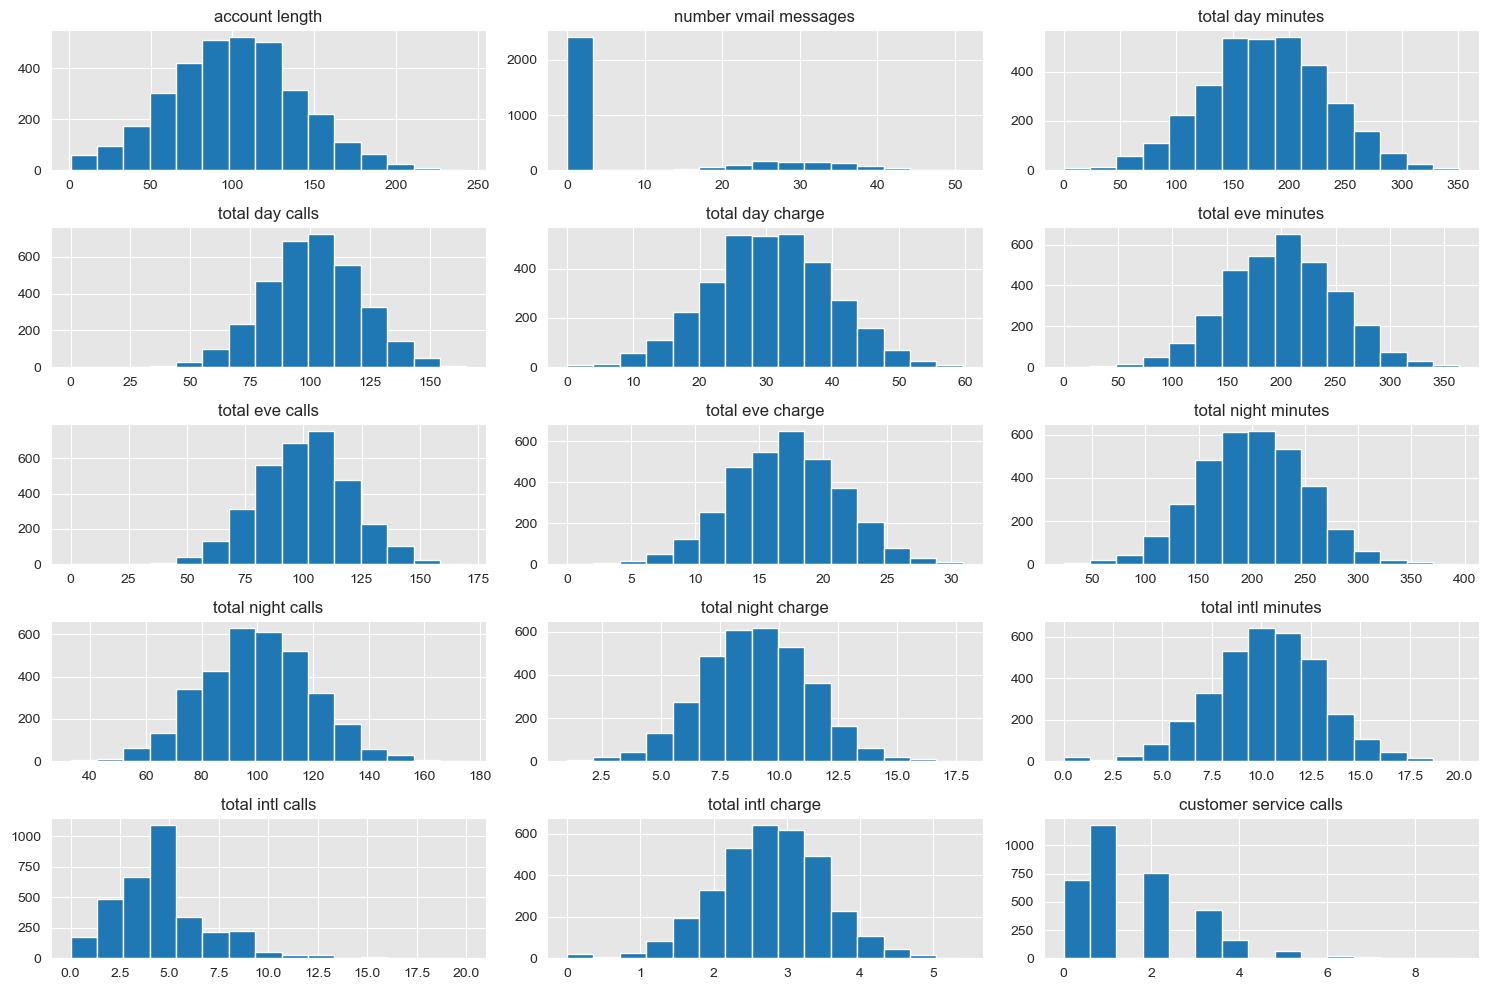

In [130]:
univariate_analysis = UnivariateAnalysis(churm_data.data)
numerical_columns =[
    'account length','number vmail messages','total day minutes','total day calls',
    'total day charge','total eve minutes','total eve calls','total eve charge',
    'total night minutes','total night calls','total night charge','total intl minutes',
    'total intl calls','total intl charge','customer service calls'
]

univariate_analysis.plot_histograms(numerical_columns)


# Categorical variables

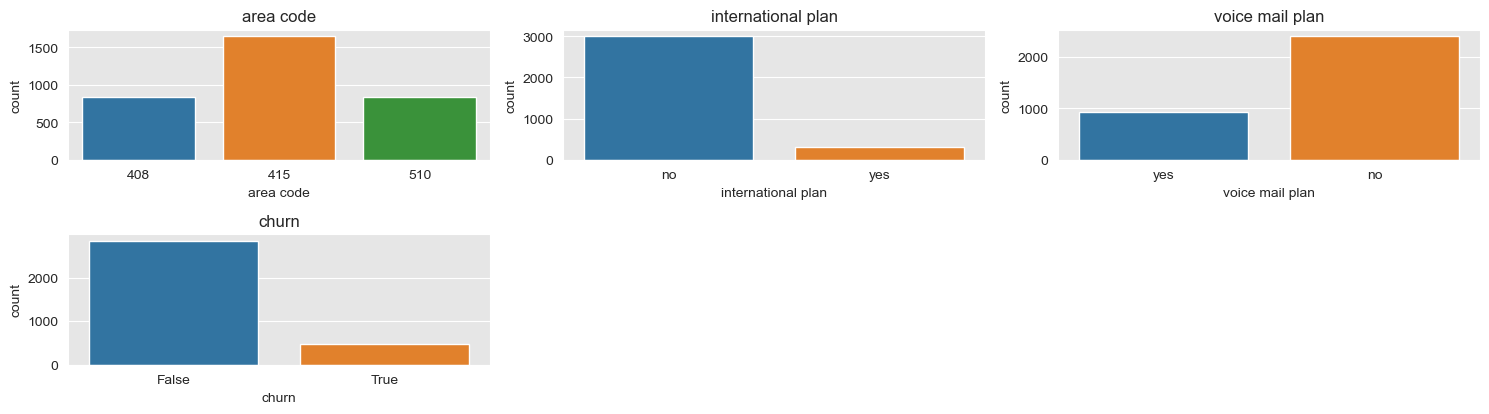

In [131]:

# Plotting bar plots for categorical columns
categorical_columns = [ 'area code', 'international plan', 'voice mail plan', 'churn']
univariate_analysis.plot_barplots(categorical_columns)

Area Code Distribution
This bar plot shows the count of customers from different area codes: 408, 415, and 510.
Insight:
The area code 415 has the highest number of customers.
The area codes 408 and 510 have a relatively similar and lower number of customers compared to 415.

This bar plot illustrates the number of customers with and without an international plan.
Insight:
A majority of customers do not have an international plan.
Only a small fraction of customers have opted for the international plan.

This bar plot shows the number of customers with and without a voicemail plan.
Insight:
More customers do not have a voicemail plan compared to those who do.
This aligns with the earlier insight that the median number of voicemail messages is zero.

In [132]:
df = pd.read_csv('Churmdata.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Churn Rates

churn
False    2850
True      483
Name: count, dtype: int64


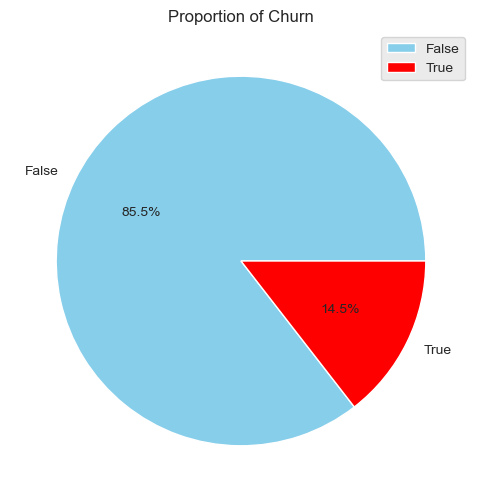

<Axes: xlabel='churn', ylabel='count'>

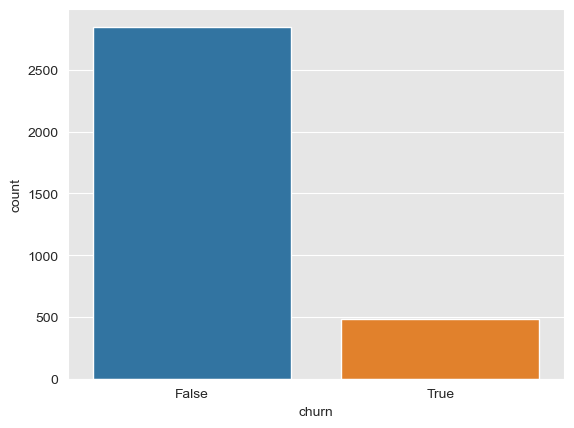

In [133]:
churn_counts = df['churn'].value_counts()
print(churn_counts)


# Plotting the distribution of churn using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['skyblue', 'red'])
plt.title('Proportion of Churn')
plt.legend(labels=['False', 'True'], loc='upper right')
plt.show()

# Plotting the distribution of churn
sns.countplot(data=df, x='churn')


Churn Proportion:

Non-Churned Customers: 85.5% of the customers have not churned, indicating that the majority of the customer base remains with the company.
Churned Customers: 14.5% of the customers have churned, which is a significant minority that needs attention.


Customer Retention:
Specifically, there are around 2,850 customers who did not churn (value 0), and about 500 customers who did churn (value 1).
This indicates an imbalance in the churn data, with a majority of customers retaining their service and a smaller portion discontinuing it.

The high percentage of non-churned customers suggests that a large portion of the customer base is satisfied or has not yet reached a point of dissatisfaction that leads to churn.
However, the 14.5% churn rate highlights an area of concern that requires targeted interventions to reduce the loss of customers.



<Figure size 1200x600 with 0 Axes>

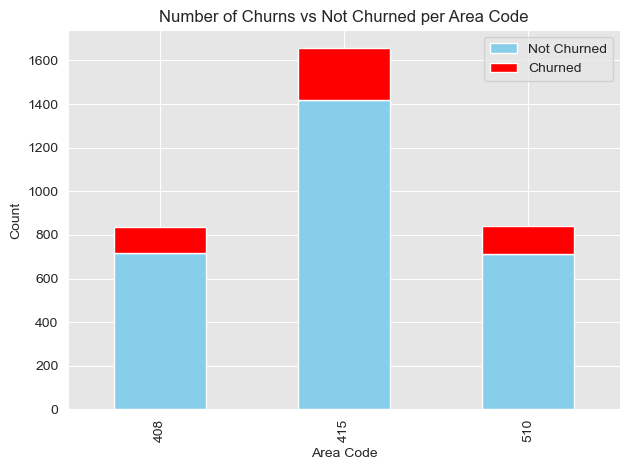

In [134]:


# Count the number of churns and not churns per area code
churn_counts = df.groupby(['area code', 'churn']).size().unstack(fill_value=0)

# Plot the distribution of churn and not churned by area code
plt.figure(figsize=(12, 6))

churn_counts.plot(kind='bar', stacked=True, color=['skyblue', 'red'])

plt.title('Number of Churns vs Not Churned per Area Code')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.legend(['Not Churned', 'Churned'], loc='upper right')

plt.tight_layout()
plt.show()


Most customers across all area codes have not churned.

Since Area Code 415 has the highest number of churned customers, it would be beneficial to conduct a detailed analysis to understand why customers are leaving.

Although 408 and 510 have fewer churned customers than 415, the rate of churn is still significant.

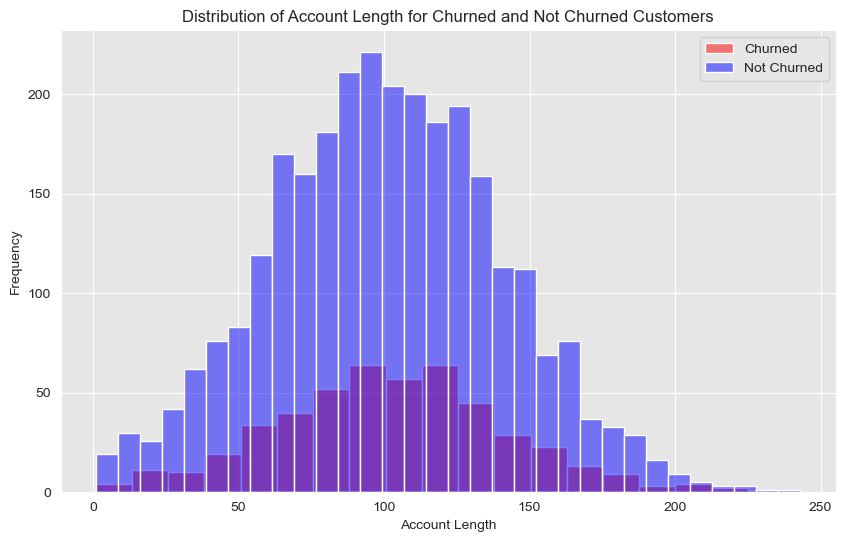

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter churned and not churned customers
churned_customers = churm_data.data[churm_data.data['churn'] == True]
not_churned_customers = churm_data.data[churm_data.data['churn'] == False]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['account length'], color='red', alpha=0.5, label='Churned')
sns.histplot(not_churned_customers['account length'], color='blue', alpha=0.5, label='Not Churned')
plt.title('Distribution of Account Length for Churned and Not Churned Customers')
plt.xlabel('Account Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Most customers, both churned and not churned, have account lengths clustered around 80 to 120.
There is a noticeable peak for both groups around this range, suggesting that a significant number of customers maintain their accounts for this duration before deciding whether to churn or not.
The distribution for customers who did not churn is higher across most account lengths, which aligns with the overall churn distribution (more customers did not churn).
The overlap in the middle of the plot indicates that customers with mid-range account lengths (about 60 to 120) have a mix of both churned and non-churned statuses.

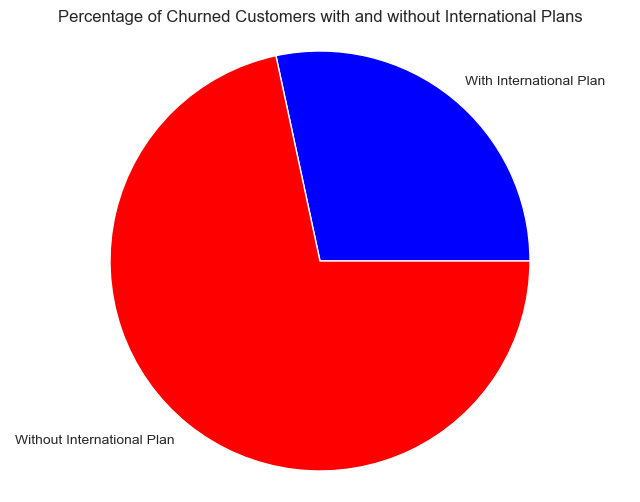

In [138]:
import matplotlib.pyplot as plt

# Calculate the number of churned customers with and without international plans
churned_with_international = churm_data.data[churm_data.data['churn'] & (churm_data.data['international plan'] == 'yes')].shape[0]
churned_without_international = churm_data.data[churm_data.data['churn'] & (churm_data.data['international plan'] == 'no')].shape[0]

# Calculate the total number of churned customers
total_churned = churm_data.data[churm_data.data['churn']].shape[0]

# Calculate the percentages
percent_with_international = (churned_with_international / total_churned) * 100
percent_without_international = (churned_without_international / total_churned) * 100

# Plotting the pie chart
labels = ['With International Plan', 'Without International Plan']
sizes = [percent_with_international, percent_without_international]
colors = ['blue','red']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors,)
plt.title('Percentage of Churned Customers with and without International Plans')
plt.axis('equal')  
plt.show()


The majority of customers who churned did not have an international plan. This suggests that the presence of an international plan might be a factor in customer retention, as fewer customers with international plans tend to churn.

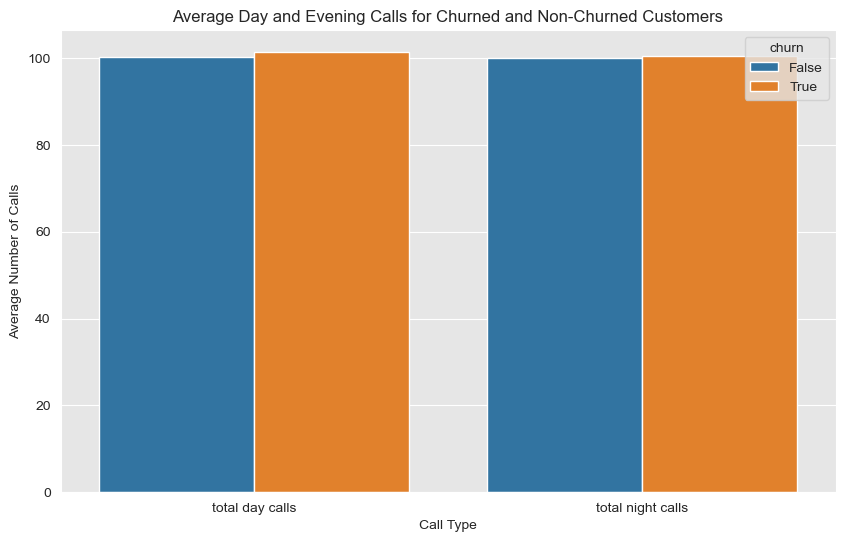

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
churm_data = pd.read_csv('Churmdata.csv')

# Ensure 'churn' column is of type category or string
churm_data['churn'] = churm_data['churn'].astype(str)

# Calculate the average number of day and evening calls for churned and non-churned customers
avg_calls = churm_data.groupby('churn')[['total day calls', 'total night calls']].mean().reset_index()

# Melt the dataframe to long format
avg_calls_melted = avg_calls.melt(id_vars='churn', var_name='Call Type', value_name='Average Calls')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Call Type', y='Average Calls', hue='churn', data=avg_calls_melted)
plt.title('Average Day and Evening Calls for Churned and Non-Churned Customers')
plt.xlabel('Call Type')
plt.ylabel('Average Number of Calls')
plt.show()


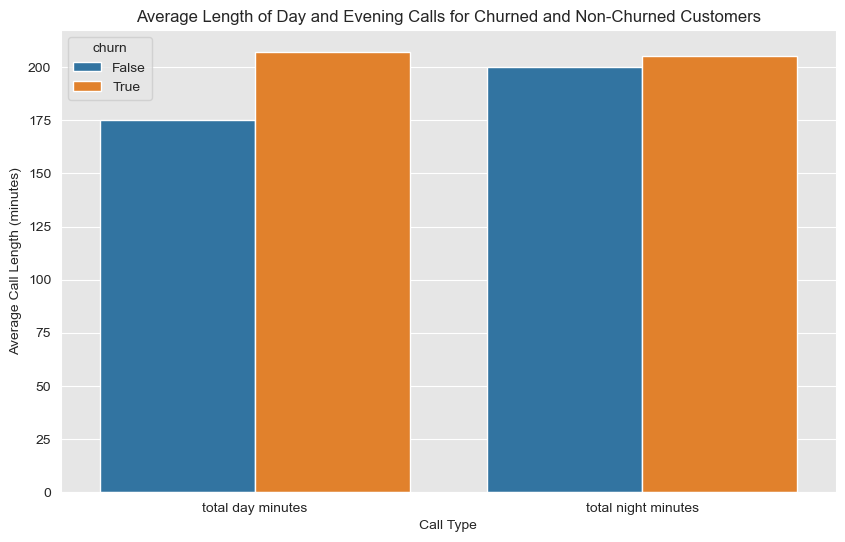

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
churm_data = pd.read_csv('Churmdata.csv')

# Ensure 'churn' column is of type category or string
churm_data['churn'] = churm_data['churn'].astype(str)

# Calculate the average length of day and evening calls for churned and non-churned customers
avg_call_length = churm_data.groupby('churn')[['total day minutes', 'total night minutes']].mean().reset_index()

# Melt the dataframe to long format
avg_call_length_melted = avg_call_length.melt(id_vars='churn', var_name='Call Type', value_name='Average Call Length')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Call Type', y='Average Call Length', hue='churn', data=avg_call_length_melted)
plt.title('Average Length of Day and Evening Calls for Churned and Non-Churned Customers')
plt.xlabel('Call Type')
plt.ylabel('Average Call Length (minutes)')
plt.show()


#  Multivariate analysis

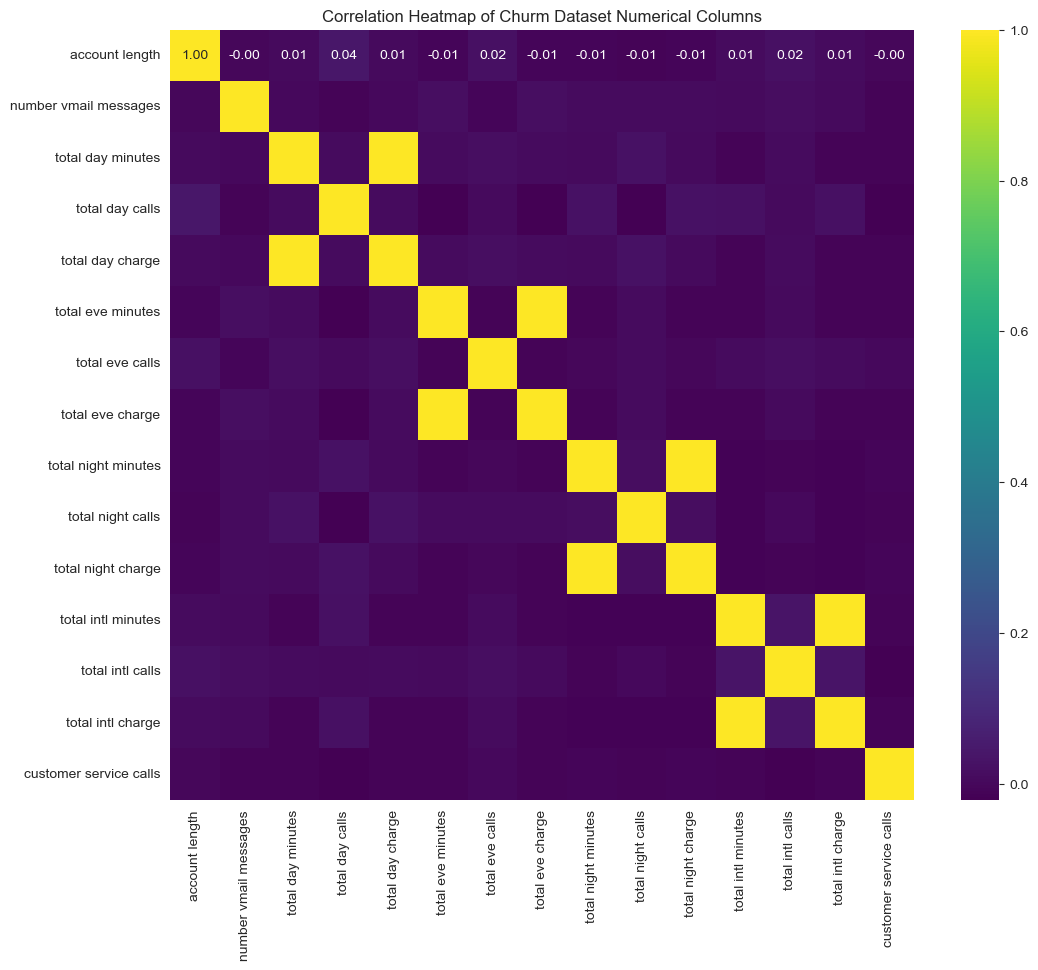

In [141]:

df =pd.read_csv('Churmdata.csv')
# Assuming you have your churn dataset loaded into a DataFrame called 'churmdata'
# You can load it with pd.read_csv('filename.csv') if it's in CSV format

# Assuming 'churmdata' is your DataFrame
numerical_columns = [
    'account length','number vmail messages','total day minutes','total day calls',
    'total day charge','total eve minutes','total eve calls','total eve charge',
    'total night minutes','total night calls','total night charge','total intl minutes',
    'total intl calls','total intl charge','customer service calls'
]

# Creating a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Churm Dataset Numerical Columns')
plt.show()


# Preprocessing.

In [142]:
df = pd.read_csv('Churmdata.csv')

In [143]:
# Converting churn column into categories
df['churn'] = df['churn'].astype('int8')
df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int8

In [144]:
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

In [145]:
#  drop the state column
df = df.drop(columns=['phone number'], axis=1)

In [146]:
df = df.drop(columns=['state'], axis=1)
df = df.drop(columns=['area code'] ,axis=1)

In [147]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Modelling.

Define the variables to be used.

Perform the split .

Balance the classes.

Scale the data

In [148]:
# Defining X and y variables
X= df.drop(columns=['churn'], axis=1)
y = df['churn']

In [149]:
# Performing a test split for the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [150]:
# using SMOTE to deal with class imbalance
smote = SMOTE()
#fit SMOTE to training data
X_train_bal,y_train_bal= smote.fit_resample(X_train,y_train)

In [151]:
print(len(X_train_bal),  len(y_train_bal),len(X_test),len(y_test) )

4514 4514 667 667


In [152]:
# Scaling the dataset
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# Convert into a Dataframe
scaled_data = pd.DataFrame(X_train_scaled, columns = X_train_bal.columns)
scaled_data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,-0.176881,-0.331937,-0.478157,-0.525532,-0.554261,0.809193,-0.554413,-0.165398,-1.257893,-0.164853,-1.559717,0.586745,-1.559232,-0.778951,-0.062547,-0.776965,0.209106
1,-1.301448,-0.331937,2.091365,2.017338,-0.805235,-1.228968,-0.805000,-0.255362,-0.182306,-0.254232,1.038166,-0.636218,1.036654,0.217442,-0.062547,0.216563,-0.489047
2,-0.961463,-0.331937,2.091365,1.853282,-0.541051,0.182067,-0.540815,2.327622,-1.042775,2.328365,0.137622,-0.210840,0.137546,-0.587337,0.802189,-0.592453,-0.489047
3,-1.039921,-0.331937,-0.478157,-0.525532,-1.726573,-0.863144,-1.726732,0.658278,-0.074748,0.658380,0.726918,-1.114769,0.727730,0.792284,-1.359650,0.798486,0.209106
4,2.307627,-0.331937,-0.478157,-0.525532,-0.792025,-0.236018,-0.792373,-0.557244,-0.236086,-0.557652,-1.868890,0.905779,-1.868156,-1.468762,-0.062547,-1.472434,-1.187200


Baseline model- Logistic regression.

In [153]:

# Initialize and fit logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled, y_train_bal)

# Predict on the testing set
y_pred = logistic_reg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7241379310344828


In [181]:
#perform a cross validation .
cv_scores = cross_val_score(logistic_reg, X_train_scaled, y_train_bal, cv=5, )
cv_scores

array([0.74197121, 0.7641196 , 0.74861573, 0.7696567 , 0.72949002])

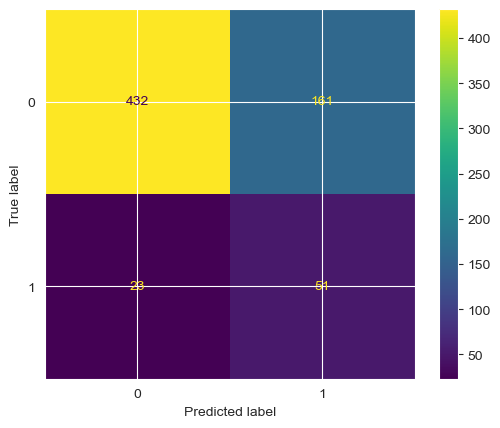

In [182]:
#Plot a confusion matrix.
ConfusionMatrixDisplay.from_estimator(estimator=logistic_reg, X=X_test_scaled, y=y_test);

In [156]:
cross_validate(logistic_reg, X_train_scaled, y_train_bal, return_train_score=True)

{'fit_time': array([0.03097558, 0.01509285, 0.02118754, 0.0216608 , 0.02769184]),
 'score_time': array([0.        , 0.        , 0.        , 0.00199699, 0.00099635]),
 'test_score': array([0.74197121, 0.7641196 , 0.74861573, 0.7696567 , 0.72949002]),
 'train_score': array([0.75214622, 0.75186929, 0.75159236, 0.75408474, 0.75913621])}

In [157]:
#checking for overfitting.
y_train_pred =  logistic_reg.predict(X_train_scaled)

train_mse = mean_squared_error(y_train_bal, y_train_pred)
test_mse = mean_squared_error(y_test, y_pred)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.24612317235268055
Test Mean Squared Error: 0.27586206896551724


There does not seem to be a big difference between the train and test MSE.No overfitting.

In [179]:

# Calculate the probability scores of each point in the training set
y_train_score = logistic_reg.decision_function(X_train_scaled)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train_bal,y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = logistic_reg.decision_function(X_test_scaled)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_score)

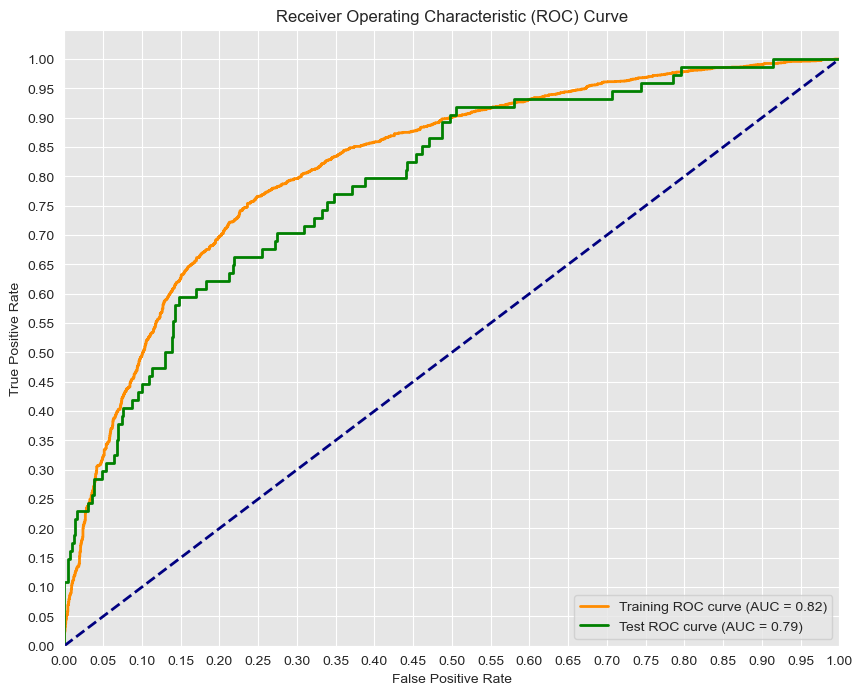

In [159]:
#Plotting the Roc curve for test and train model separately.


sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

# Plot ROC curve for training set
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='Training ROC curve (AUC = {:.2f})'.format(auc(train_fpr, train_tpr)))

# Plot ROC curve for test set
plt.plot(test_fpr, test_tpr, color='green',
         lw=lw, label='Test ROC curve (AUC = {:.2f})'.format(auc(test_fpr, test_tpr)))

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Adjustments to the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


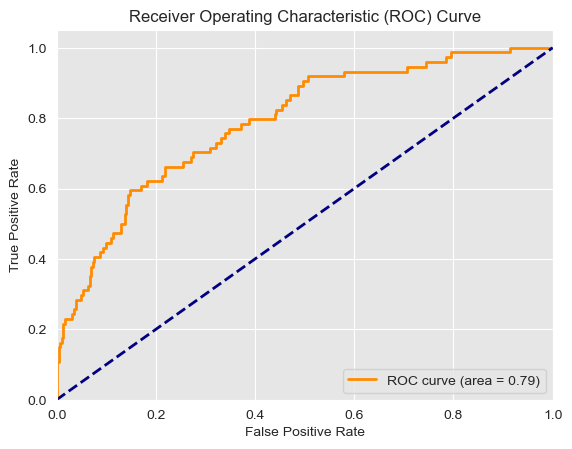

In [160]:
y_prob = logistic_reg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Second model - KNN MODEL

In [161]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf =  KNeighborsClassifier()


# Fit the classifier
clf.fit(X_train_scaled,y_train_bal)

# Predict on the test set
test_preds = clf.predict(X_test_scaled)

report = classification_report(y_test, test_preds, )
print(report)

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       593
           1       0.30      0.72      0.43        74

    accuracy                           0.79       667
   macro avg       0.63      0.76      0.65       667
weighted avg       0.88      0.79      0.82       667



In [162]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels,preds)))
    print("Recall Score: {}".format(recall_score(labels,preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels,preds)))
    print("F1 Score: {}".format(f1_score(labels,preds)))
    
print_metrics(y_test,test_preds)


Precision Score: 0.3045977011494253
Recall Score: 0.7162162162162162
Accuracy Score: 0.7871064467766117
F1 Score: 0.4274193548387097


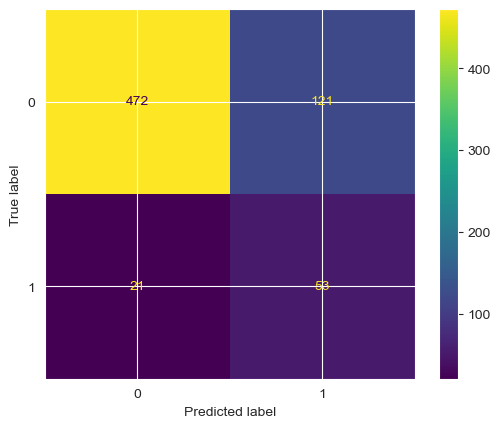

In [163]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X_test_scaled, y=y_test);



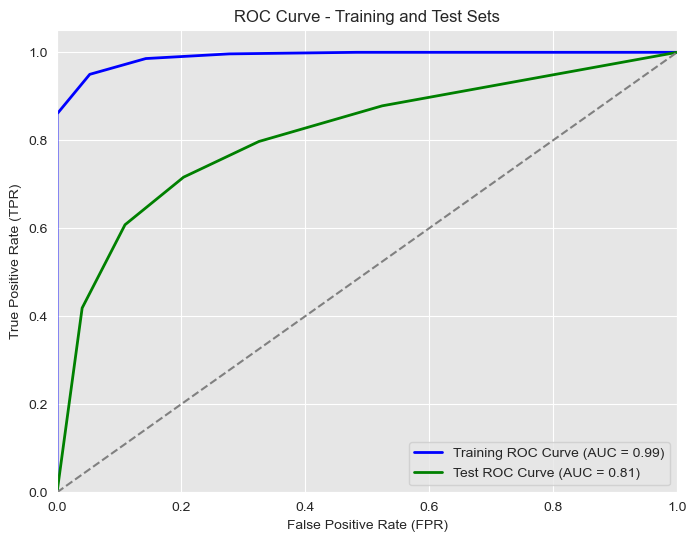

In [164]:
# Predict probabilities on the training set
train_probs = clf.predict_proba(X_train_scaled)[:, 1]

# Generate ROC curve values for training set
fpr_train, tpr_train, _ = roc_curve(y_train_bal, train_probs)

# Calculate AUC score for training set
auc_score_train = roc_auc_score(y_train_bal, train_probs)

# Predict probabilities on the test set
test_probs = clf.predict_proba(X_test_scaled)[:, 1]

# Generate ROC curve values for test set
fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)

# Calculate AUC score for test set
auc_score_test = roc_auc_score(y_test, test_probs)

# Plot ROC curves for both training and test sets
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC Curve (AUC = {auc_score_train:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC Curve (AUC = {auc_score_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Training and Test Sets')
plt.legend(loc='lower right')
plt.show()


AUC Score: 0.8117451346793674


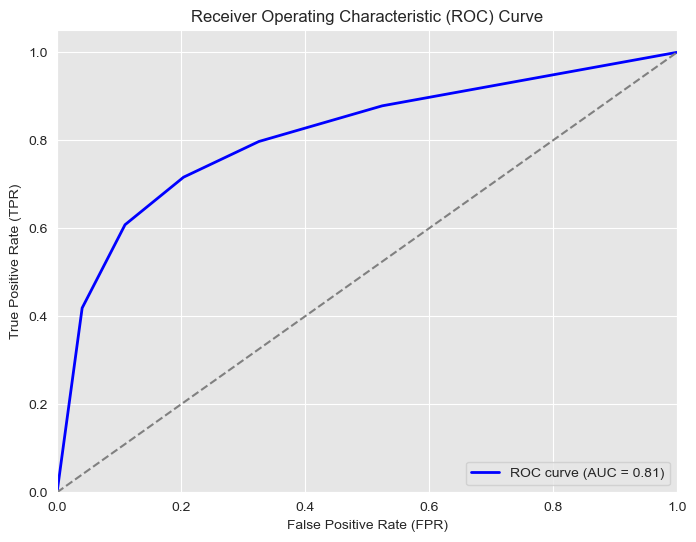

In [165]:


# Predict probabilities on the test set
test_probs = clf.predict_proba(X_test_scaled)[:, 1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, test_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, test_probs)
print(f"AUC Score: {auc_score}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# MODEL 3-Decision Tree

In [166]:
Classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=10)
Classifier.fit(X_train_scaled,y_train_bal)


DecisionTreeClassifier(criterion='entropy', random_state=10)

In [167]:
y_pred = Classifier.predict(X_test_scaled)

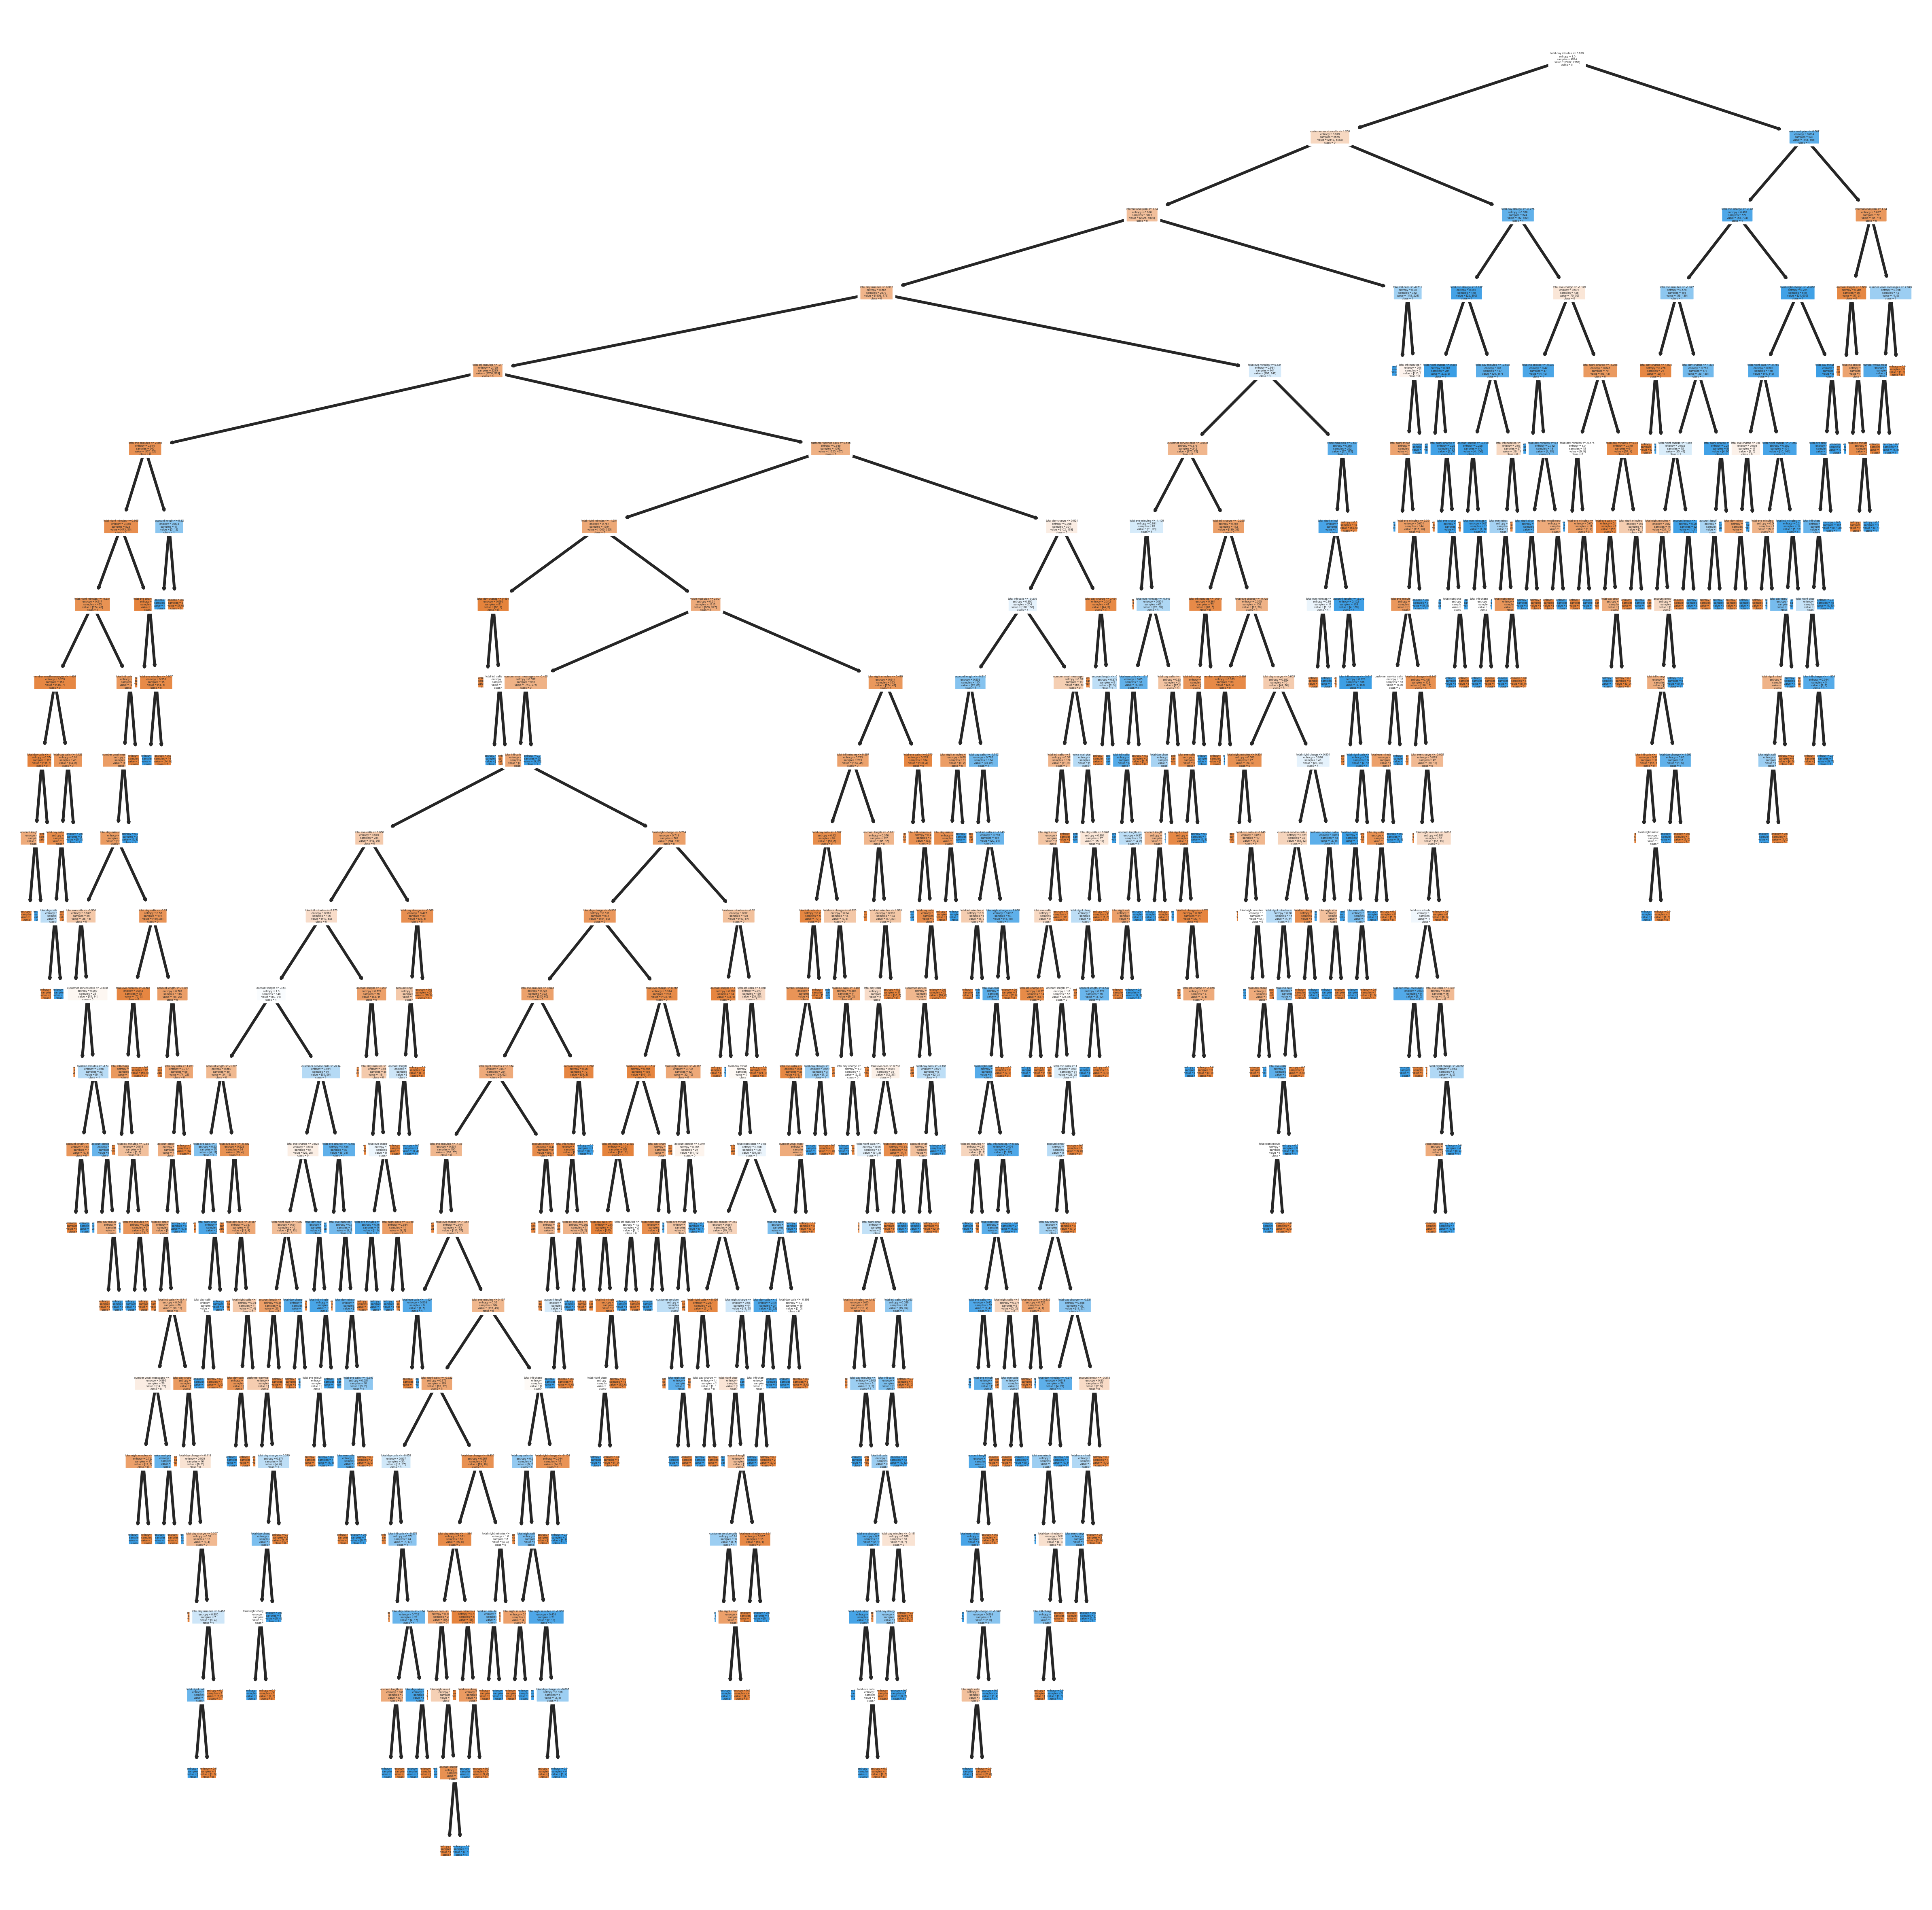

In [168]:
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(Classifier, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

In [169]:
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy is :82.6086956521739

AUC is :0.84

Confusion Matrix
----------------


Predicted,0,1,All
Actual,,,
0,488,105,593
1,11,63,74
All,499,168,667


In [170]:
report = classification_report(y_test, y_pred, )
print(report)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       593
           1       0.38      0.85      0.52        74

    accuracy                           0.83       667
   macro avg       0.68      0.84      0.71       667
weighted avg       0.91      0.83      0.85       667



# Hyperparametre tuning.



In [171]:


# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=10))
])

# Define parameters for GridSearchCV
parameters = {
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__criterion': ['gini', 'entropy']
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_bal)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'dt__criterion': 'entropy', 'dt__max_depth': 10, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 10}
Best ROC AUC Score: 0.9078498833095425


In [172]:

# Best parametres model.
pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=10, 
                                  min_samples_leaf=4, 
                                  min_samples_split=2, 
                                  random_state=10))
])

# Fit the model
pipeline.fit(X_train_scaled, y_train_bal)

# Predict on the test set
test_preds = pipeline.predict(X_test_scaled)

# Print classification report
print("Classification Report:\n", classification_report(y_test, test_preds))

# Calculate ROC AUC score
test_probs = pipeline.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, test_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       593
           1       0.60      0.82      0.69        74

    accuracy                           0.92       667
   macro avg       0.79      0.88      0.82       667
weighted avg       0.93      0.92      0.92       667

ROC AUC Score: 0.9185


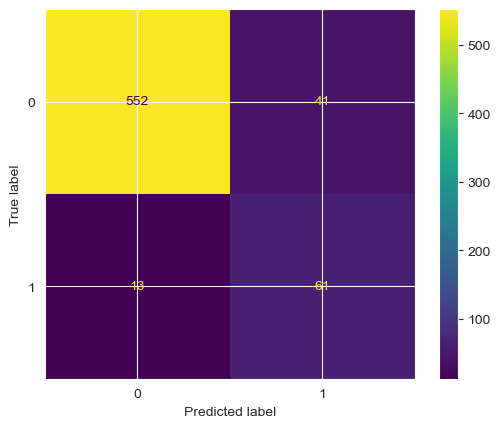

In [173]:
ConfusionMatrixDisplay.from_estimator(pipeline, X=X_test_scaled, y=y_test);

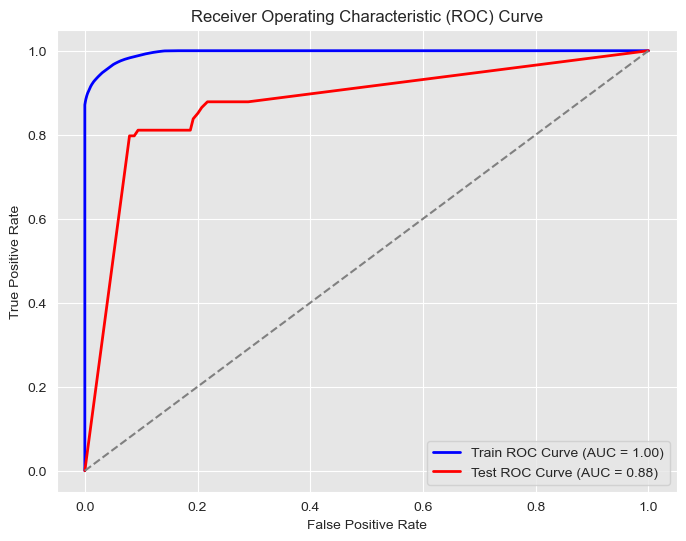

In [174]:


#Roc curve for best parametres model.
pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=20, 
                                  min_samples_leaf=4, 
                                  min_samples_split=10, 
                                  random_state=10))
])


pipeline.fit(X_train_scaled, y_train_bal)

train_probs = pipeline.predict_proba(X_train_scaled)[:, 1]
test_probs = pipeline.predict_proba(X_test_scaled)[:, 1]

#  Calculate ROC curve and ROC AUC for training and testing sets
train_fpr, train_tpr, _ = roc_curve(y_train_bal, train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

train_roc_auc = roc_auc_score(y_train_bal, train_probs)
test_roc_auc = roc_auc_score(y_test, test_probs)

# S: Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', lw=2, label=f'Train ROC Curve (AUC = {train_roc_auc:.2f})')
plt.plot(test_fpr, test_tpr, color='red', lw=2, label=f'Test ROC Curve (AUC = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


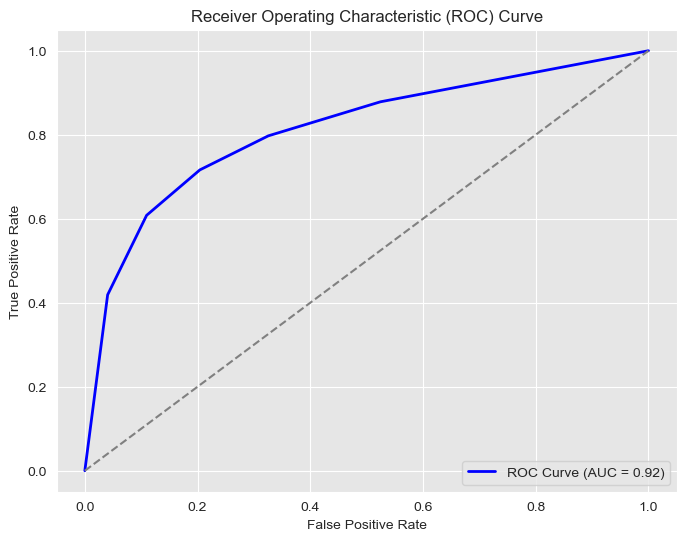

In [175]:
import matplotlib.pyplot as plt

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Model 4 - Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier instance
random_forest = RandomForestClassifier()

# Fit the model to the training data
random_forest.fit(X_train_scaled, y_train_bal)

# Predict on the testing set
y_pred_rf = random_forest.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)


Accuracy: 0.9265367316341829


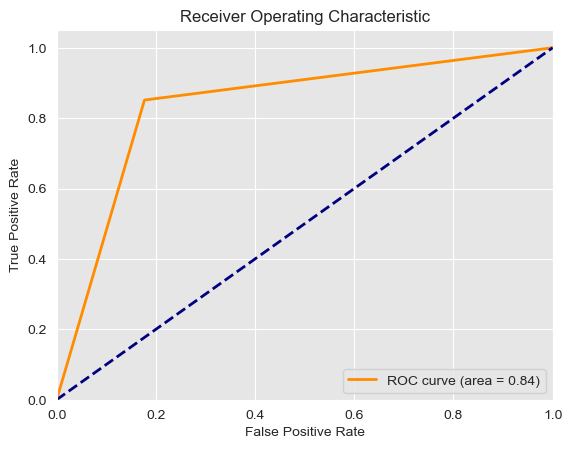

In [183]:


# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


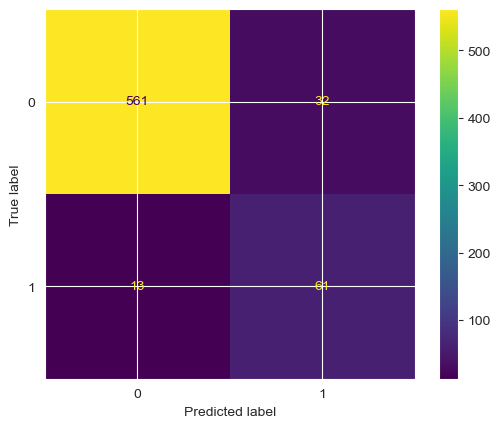

In [ ]:
ConfusionMatrixDisplay.from_estimator(random_forest, X=X_test_scaled, y=y_test);


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       593
           1       0.66      0.82      0.73        74

    accuracy                           0.93       667
   macro avg       0.82      0.89      0.85       667
weighted avg       0.94      0.93      0.94       667



# Feature Selection 

In [ ]:
clf = RandomForestClassifier(random_state=42, n_estimators=4)
clf.fit(X_train_scaled, y_train_bal)

# Perform RFECV
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train_bal)

print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features: %s" % list(X.columns[rfecv.support_]))

# Retrain the model with selected features
X_train_selected = X_train_scaled[:, rfecv.support_]
X_test_selected = X_test_scaled[:, rfecv.support_]

clf_selected = RandomForestClassifier(random_state=42, n_estimators=4)
clf_selected.fit(X_train_selected, y_train_bal)

# Predictions with the new model
y_clf_selected_pred = clf_selected.predict(X_test_selected)

# Classifier accuracy score for the new model
clf_selected_score = clf_selected.score(X_train_selected,y_train_bal)
print("Selected Features Model Training Accuracy:", clf_selected_score)

# Get the cross-validation scores for the new model
clf_selected_cv = cross_val_score(clf_selected, X_train_selected, y_train_bal, cv=5)
print("Selected Features Cross-validation Scores:", clf_selected_cv)


# Summary classification report for the new model
clf_selected_report = classification_report(y_test, y_clf_selected_pred)
print("Selected Features Model Classification Report:\n", clf_selected_report)

Optimal number of features: 17
Selected features: ['account length', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
Selected Features Model Training Accuracy: 0.9789543642002658
Selected Features Cross-validation Scores: [0.86157254 0.88150609 0.88372093 0.87596899 0.87694013]
Selected Features Model Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       593
           1       0.54      0.66      0.60        74

    accuracy                           0.90       667
   macro avg       0.75      0.80      0.77       667
weighted avg       0.91      0.90      0.91       667

